# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [8]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
sinasc_raw['Latitude_Faixa'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])


estatisticas = sinasc_raw.groupby('Latitude_Faixa').agg({
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

estatisticas

Latitude_Faixa    APGAR1                                                  \
                         sum      mean  min   max median       std       var   
0  Abaixo de -10.5  104590.0  8.070216  0.0  10.0    8.0  0.960767  0.923073   
1   Acima de -10.5  114559.0  8.199771  0.0  10.0    8.0  1.002839  1.005686   

       PESO                                                             
        sum         mean  min   max  median         std            var  
0  42098594  3240.098053  258  5985  3270.0  531.815114  282827.315354  
1  45555148  3246.055864  295  5190  3275.0  556.487709  309678.570242

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [14]:
sinasc_raw['Area_Faixa'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])
estatisticas_area = sinasc_raw.groupby('Area_Faixa').agg({
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()
estatisticas_area

Area_Faixa    APGAR5                                                  \
                        sum      mean  min   max median       std       var   
0  Abaixo de 3000   47560.0  9.130351  0.0  10.0    9.0  0.801124  0.641799   
1   Acima de 3000  199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299   

  CONSULTAS                                               
        sum      mean min max median       std       var  
0     19520  3.740180   1   9    4.0  0.607492  0.369046  
1     77142  3.537326   1   9    4.0  0.820967  0.673986

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [26]:
sinasc_raw['Altitude_Faixa'] = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), 200, 500, float('inf')], labels=['Abaixo de 200', '200 a 500', 'Acima de 500'])

estatisticas_altitude = sinasc_raw.groupby('Altitude_Faixa').agg({
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

estatisticas_altitude

Altitude_Faixa    APGAR1                                                  \
                       sum      mean  min   max median       std       var   
0  Abaixo de 200  168862.0  8.140282  0.0  10.0    8.0  0.989649  0.979404   
1      200 a 500   37229.0  8.089744  0.0  10.0    8.0  1.007248  1.014548   
2   Acima de 500   13058.0  8.238486  0.0  10.0    8.0  0.838564  0.703190   

  CONSULTAS                                               
        sum      mean min max median       std       var  
0     73572  3.532530   1   9    4.0  0.827557  0.684851  
1     17086  3.706291   1   9    4.0  0.608809  0.370648  
2      6004  3.776101   1   9    4.0  0.636765  0.405470

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [28]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

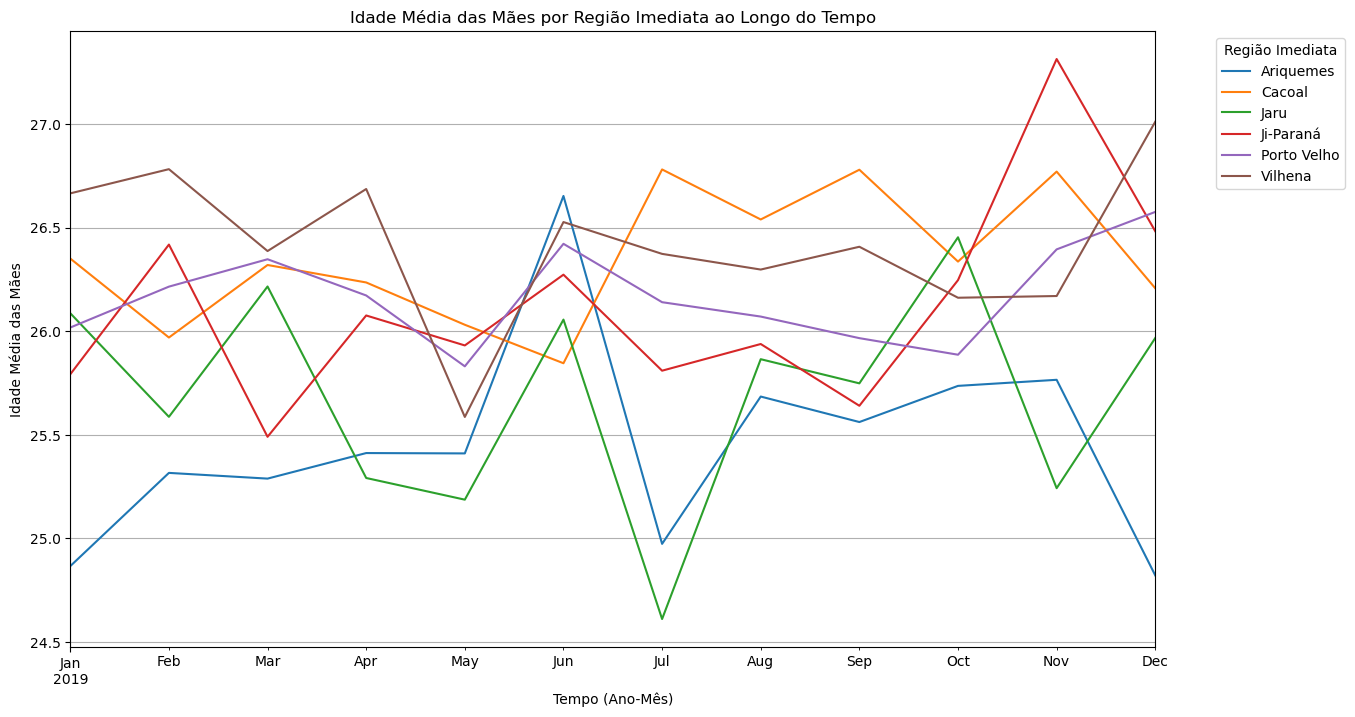

In [32]:
sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['AnoMes'] = sinasc_raw['DTNASC'].dt.to_period('M')
idade_media_regiao = sinasc_raw.groupby(['AnoMes', 'Regiao_Imediata'])['IDADEMAE'].mean().unstack()
plt.figure(figsize=(14, 8))
idade_media_regiao.plot(ax=plt.gca())
plt.title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
plt.xlabel('Tempo (Ano-Mês)')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [36]:
idh_data = {
    'Município': ['Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura'],
    'IDH': [0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700]
}

df_idh = pd.DataFrame(idh_data)
df_idh['Faixa_IDH'] = pd.cut(df_idh['IDH'], bins=[0, 0.600, 0.700, 0.800, 1.000], labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])
agrupamento_idh = df_idh.groupby('Faixa_IDH').agg({
    'IDH': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()
agrupamento_idh

Faixa_IDH    IDH                                                 
                 sum    mean    min    max median       std       var
0       Baixo  0.000     NaN    NaN    NaN    NaN       NaN       NaN
1       Médio  0.700  0.7000  0.700  0.700  0.700       NaN       NaN
2        Alto  4.311  0.7185  0.702  0.736  0.716  0.012865  0.000166
3  Muito Alto  0.000     NaN    NaN    NaN    NaN       NaN       NaN

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [38]:
ifdm_data = {
    'Município': ['Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 'Santa Luzia d\'Oeste'],
    'IFDM': [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850]
}
df_ifdm = pd.DataFrame(ifdm_data)
df_ifdm['Faixa_IFDM'] = pd.cut(df_ifdm['IFDM'], bins=[0, 0.400, 0.600, 0.800, 1.000], labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
agrupamento_ifdm = df_ifdm.groupby('Faixa_IFDM').agg({
    'IFDM': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()


agrupamento_ifdm

Faixa_IFDM    IFDM                                                     
                 sum      mean    min     max  median       std       var
0      Baixo  0.0000       NaN    NaN     NaN     NaN       NaN       NaN
1    Regular  0.0000       NaN    NaN     NaN     NaN       NaN       NaN
2   Moderado  5.0929  0.727557  0.685  0.7746  0.7257  0.028937  0.000837
3       Alto  0.0000       NaN    NaN     NaN     NaN       NaN       NaN

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [40]:
pib_data = {
    'Município': ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura'],
    'PIB': [20765.24, 5428.19, 3915.24, 3690.14, 3436.55, 1680.35, 1603.79]
}
df_pib = pd.DataFrame(pib_data)
df_pib['Faixa_PIB'] = pd.cut(df_pib['PIB'], bins=[0, 2000, 4000, 6000, 21000], labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

agrupamento_pib = df_pib.groupby('Faixa_PIB').agg({
    'PIB': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()
agrupamento_pib

Faixa_PIB       PIB                                              \
                    sum          mean       min       max    median   
0       Baixo   3284.14   1642.070000   1603.79   1680.35   1642.07   
1       Médio  11041.93   3680.643333   3436.55   3915.24   3690.14   
2        Alto   5428.19   5428.190000   5428.19   5428.19   5428.19   
3  Muito Alto  20765.24  20765.240000  20765.24  20765.24  20765.24   

                             
          std           var  
0   54.136095   2930.716800  
1  239.486261  57353.669033  
2         NaN           NaN  
3         NaN           NaN

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Vemos que em RO só existe IFDM moderado